### **Importing libraries**

In [259]:
import pandas as pd

In [260]:
import matplotlib.pyplot as plt

In [261]:
import seaborn as sns

### **Loading the Dataset**

In [262]:
employee = pd.read_excel('/content/Employee Sample Data - Copy.xlsx')

In [263]:
employee.head(10)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29,99975.0,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26,163099.0,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27,84913.0,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20,95409.0,0.00,United States,Phoenix,NaT
5,E00644,Joshua Gupta,Account Representative,Sales,Corporate,Male,Asian,57.0,2017-01-24,50994.0,0.00,China,Chongqing,NaT
6,E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27.0,2020-07-01,119746.0,0.10,United States,Phoenix,NaT
7,E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25.0,2020-05-16,41336.0,0.00,United States,Miami,2021-05-20
8,E04533,Easton Bailey,Manager,Accounting,Manufacturing,Male,Caucasian,29.0,2019-01-25,113527.0,0.06,United States,Austin,NaT
9,E03838,Madeline Walker,Sr. Analyst,Finance,Speciality Products,Female,Caucasian,34.0,2018-06-13,77203.0,0.00,United States,Chicago,NaT


In [264]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      998 non-null    object        
 2   Job Title      999 non-null    object        
 3   Department     998 non-null    object        
 4   Business Unit  1000 non-null   object        
 5   Gender         999 non-null    object        
 6   Ethnicity      993 non-null    object        
 7   Age            994 non-null    float64       
 8   Hire Date      993 non-null    datetime64[ns]
 9   Annual Salary  989 non-null    float64       
 10  Bonus %        992 non-null    float64       
 11  Country        998 non-null    object        
 12  City           998 non-null    object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 109.5+ KB


In [265]:
employee.isnull().sum()

EEID               0
Full Name          2
Job Title          1
Department         2
Business Unit      0
Gender             1
Ethnicity          7
Age                6
Hire Date          7
Annual Salary     11
Bonus %            8
Country            2
City               2
Exit Date        915
dtype: int64

In [266]:
employee['City'].fillna(employee['City'].mode()[0], inplace=True)
employee['Country'].fillna(employee['Country'].mode()[0], inplace=True)
employee['Gender'].fillna(employee['Gender'].mode()[0], inplace=True)
employee['Department'].fillna(employee['Department'].mode()[0], inplace=True)
employee['Job Title'].fillna(employee['Job Title'].mode()[0], inplace=True)
employee['Ethnicity'].fillna(employee['Ethnicity'].mode()[0], inplace=True)

In [267]:
employee['Full Name'].fillna('unknown', inplace=True)

In [268]:
employee['Age'].fillna(employee['Age'].median(), inplace=True)

In [269]:
employee['Bonus %'].fillna(employee['Bonus %'].median(), inplace = True) # changes were made
employee['Annual Salary'].fillna(employee['Annual Salary'].median(), inplace = True) # changes were made

In [270]:
employee.isnull().sum()

EEID               0
Full Name          0
Job Title          0
Department         0
Business Unit      0
Gender             0
Ethnicity          0
Age                0
Hire Date          7
Annual Salary      0
Bonus %            0
Country            0
City               0
Exit Date        915
dtype: int64

In [271]:
employee.tail(5)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33.0,2016-09-18,98427.0,0.00,United States,Columbus,NaT
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44.0,2010-05-31,47387.0,0.00,China,Chengdu,2018-01-08
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31.0,2019-06-10,176710.0,0.15,United States,Miami,NaT
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33.0,2012-01-28,95960.0,0.00,China,Chengdu,NaT
999,E03545,Sofia Cheng,Vice President,Accounting,Corporate,Female,Asian,63.0,2020-07-26,216195.0,0.31,United States,Miami,NaT


In [272]:
employee.loc[0] = ['E23748','Yousef AbuALi', "AI","IT","bussiness","Male","Asian",20.0,'2018-05-22 00:00:00',19000.0,4.90,"United States","Miami","2020-01-08 00:00:00"]
employee.loc[1] = ['E74548','Jude tuqan', "marketing","bussiness","bussiness","Female","Asian",25.0,'2011-01-03 00:00:00',9000.0,2.90,"United States","Columbus","2018-05-25 00:00:00"]
employee.loc[2] = ['E84048','Jehad tuqan', "bussiness","security","bussiness","Male","Asian",23.0,'2009-09-09 00:00:00',10000.0,0.90,"United States","Columbus","2012-09-18 00:00:00"]
employee.loc[3] = ['E12637','Hamza elabed', "Doctor","doctor","doctor","Male","Asian",19.0,'2020-12-23 00:00:00',15000.0,6.90,"United States","Chicago","2023-08-08 00:00:00"]
employee.loc[4] = ['E40971','issa elabed', "Doctor","doctor","doctor","Male","Asian",22.0,'2021-10-15 00:00:00',15000.0,6.90,"United States","Chicago","2022-03-23 00:00:00"]

In [273]:
employee.head(5)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E23748,Yousef AbuALi,AI,IT,bussiness,Male,Asian,20.0,2018-05-22,19000.0,4.9,United States,Miami,2020-01-08
1,E74548,Jude tuqan,marketing,bussiness,bussiness,Female,Asian,25.0,2011-01-03,9000.0,2.9,United States,Columbus,2018-05-25
2,E84048,Jehad tuqan,bussiness,security,bussiness,Male,Asian,23.0,2009-09-09,10000.0,0.9,United States,Columbus,2012-09-18
3,E12637,Hamza elabed,Doctor,doctor,doctor,Male,Asian,19.0,2020-12-23,15000.0,6.9,United States,Chicago,2023-08-08
4,E40971,issa elabed,Doctor,doctor,doctor,Male,Asian,22.0,2021-10-15,15000.0,6.9,United States,Chicago,2022-03-23


In [274]:
largestSalary = employee.nlargest(1, "Annual Salary")
largestSalary

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
989,E04354,Raelynn Rios,Vice President,Sales,Manufacturing,Female,Latino,43.0,2016-08-21,258498.0,0.35,United States,Columbus,NaT


In [275]:
employee['Exit Date'] = employee['Exit Date'].fillna(pd.to_datetime('2020-12-31'))
employee['Hire Date'] = employee['Hire Date'].fillna(pd.to_datetime('2020-12-31'))
employee['Hire Date'] = pd.to_datetime(employee['Hire Date'])
employee['Exit Date'] = pd.to_datetime(employee['Exit Date'])

In [276]:
employee.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E23748,Yousef AbuALi,AI,IT,bussiness,Male,Asian,20.0,2018-05-22,19000.0,4.9,United States,Miami,2020-01-08
1,E74548,Jude tuqan,marketing,bussiness,bussiness,Female,Asian,25.0,2011-01-03,9000.0,2.9,United States,Columbus,2018-05-25
2,E84048,Jehad tuqan,bussiness,security,bussiness,Male,Asian,23.0,2009-09-09,10000.0,0.9,United States,Columbus,2012-09-18
3,E12637,Hamza elabed,Doctor,doctor,doctor,Male,Asian,19.0,2020-12-23,15000.0,6.9,United States,Chicago,2023-08-08
4,E40971,issa elabed,Doctor,doctor,doctor,Male,Asian,22.0,2021-10-15,15000.0,6.9,United States,Chicago,2022-03-23


In [277]:
employee.to_excel("employee.xlsx", index=False)

# **Data exploration**

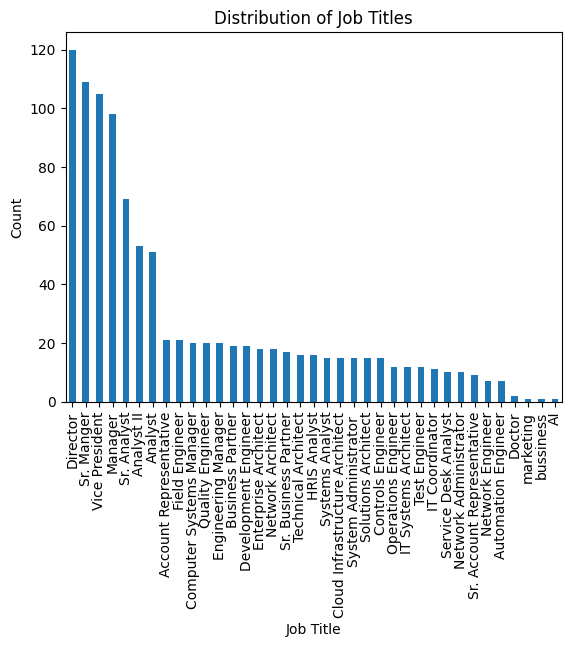

In [150]:
employee['Job Title'].value_counts().plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Distribution of Job Titles')
plt.show()

From this bar plot it seems that the Director, Sr. Manager, vice president, and Manager are the most common jobs.
on the other side, Doctor, marketing, bussiness, and AI are the least common jobs.

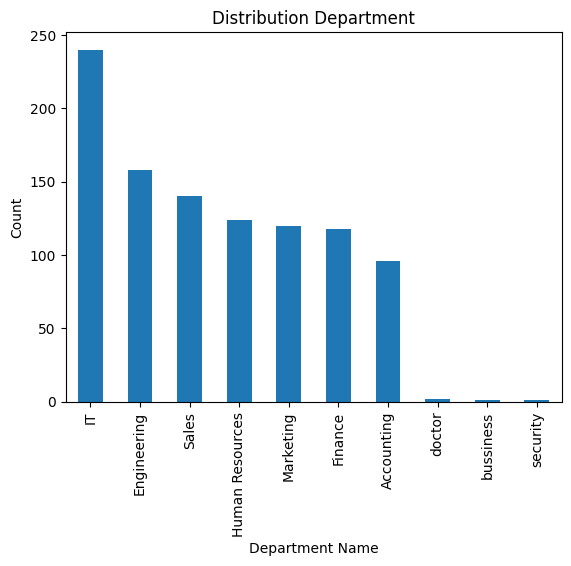

In [151]:
employee['Department'].value_counts().plot(kind='bar')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.title('Distribution Department')
plt.show()

It seems from this bar plot, that the most common department is the IT department followed by the engineering and sales. while doctor, bussiness and security were the least common department.

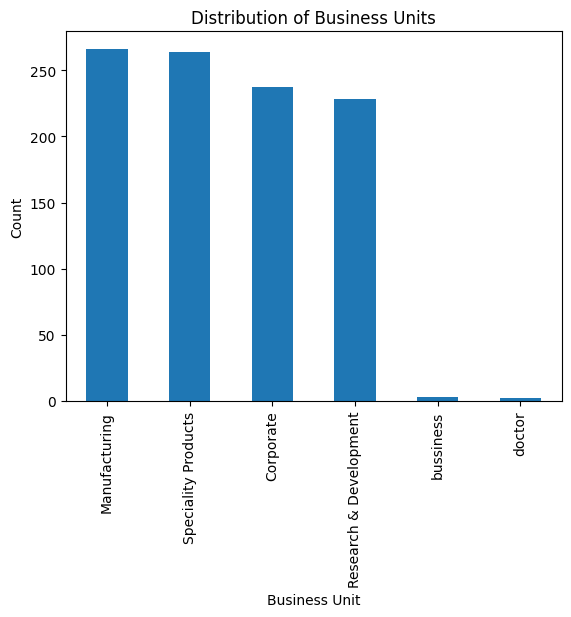

In [152]:
employee['Business Unit'].value_counts().plot(kind='bar')
plt.xlabel('Business Unit')
plt.ylabel('Count')
plt.title('Distribution of Business Units')
plt.show()

it looks from this bar plot the manufacturing, speciality products, corporate, and research & Development units are very common, while bussiness and doctor units are less common, and this because they were less in all columns.

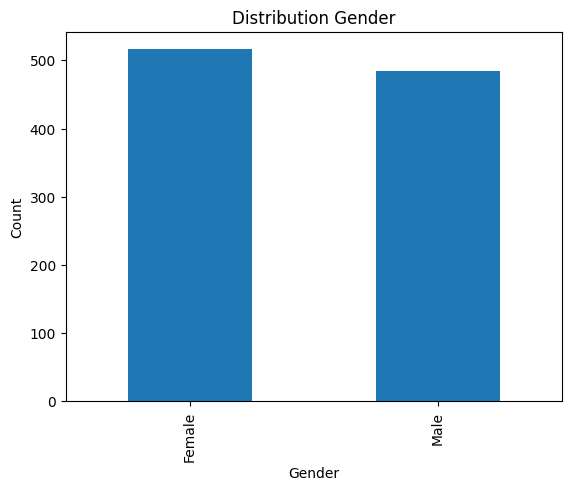

In [153]:
employee['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution Gender')
plt.show()

This bar plot shows that there is gender balance in the dataset, which means thier is no gender bias.

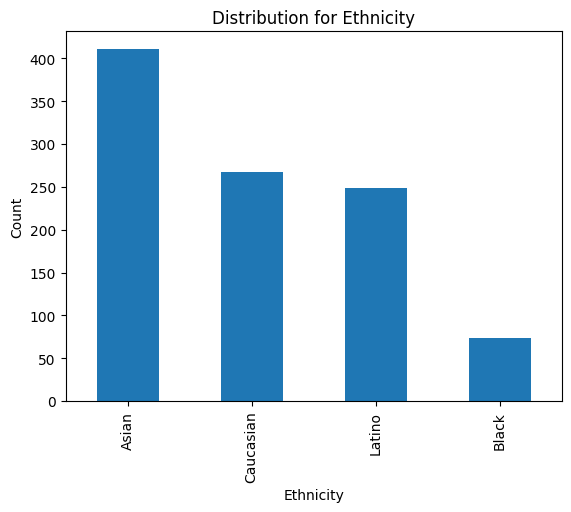

In [154]:
employee['Ethnicity'].value_counts().plot(kind='bar')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Distribution for Ethnicity')
plt.show()

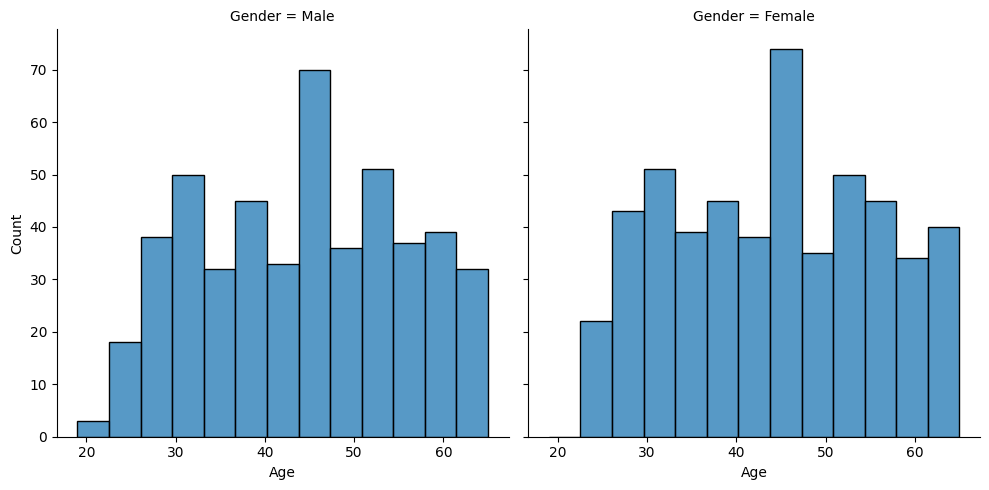

In [155]:
sns.displot(employee, x="Age", col="Gender")
plt.show()

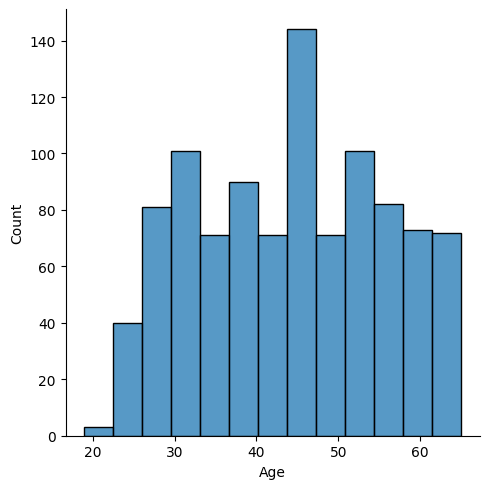

In [156]:
sns.displot(employee, x="Age")
plt.show()

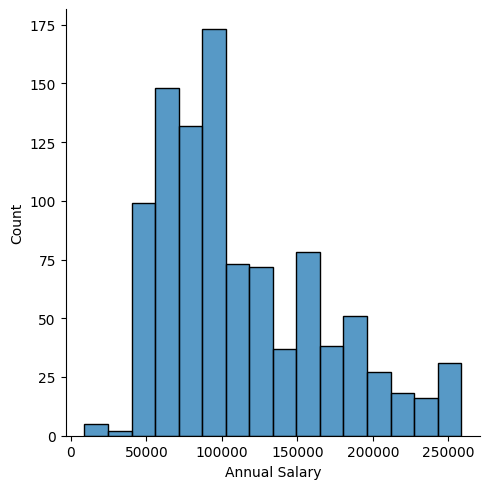

In [157]:
sns.displot(employee, x="Annual Salary")
plt.show()

from this plot it looks that the salary is centered between 50000 and 100000

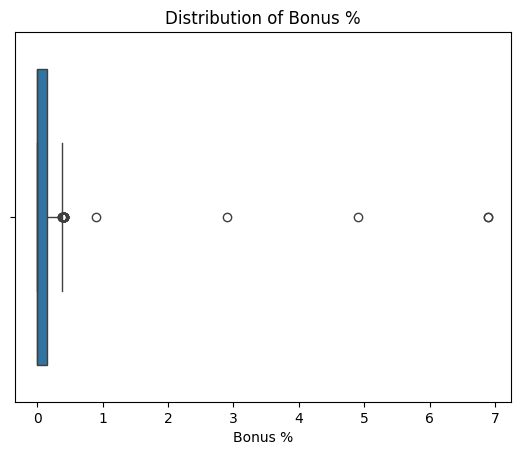

In [158]:
sns.boxplot(x='Bonus %', data=employee)
plt.xlabel('Bonus %')
plt.title('Distribution of Bonus %')
plt.show()

In [159]:
employee.head(3)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,23748,Yousef AbuALi,AI,IT,bussiness,Male,Asian,20.0,2018-05-22 00:00:00,19000.0,4.9,United States,Miami,2020-01-08 00:00:00
1,74548,Jude tuqan,marketing,bussiness,bussiness,Female,Asian,25.0,2011-01-03 00:00:00,9000.0,2.9,United States,Columbus,2018-05-25 00:00:00
2,84048,Jehad tuqan,bussiness,security,bussiness,Male,Asian,23.0,2009-09-09 00:00:00,10000.0,0.9,United States,Columbus,2012-09-18 00:00:00


this box plot shows that most bonuses are centered between 0-0.5 with some outliers

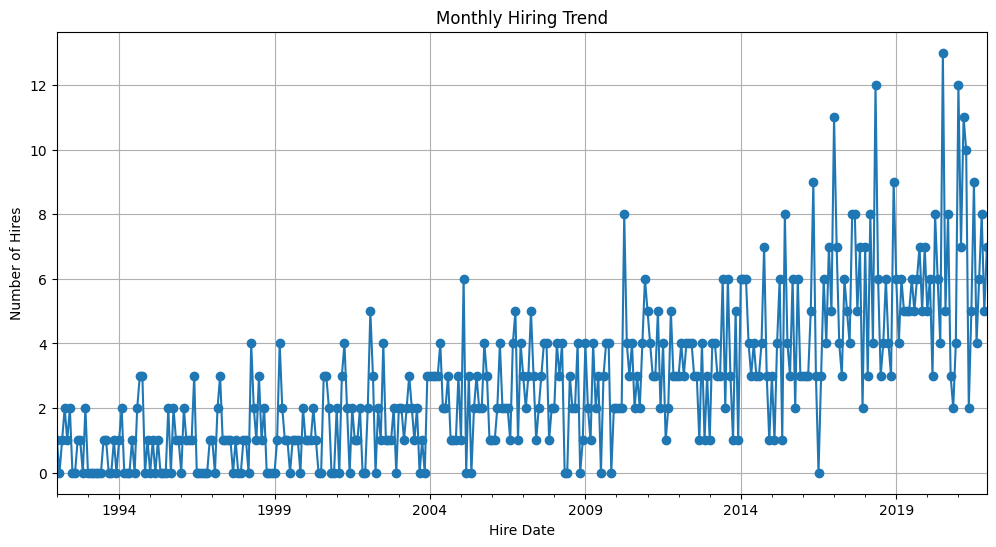

In [160]:
employee['Hire Date'] = pd.to_datetime(employee['Hire Date'], errors='coerce')
employee.set_index('Hire Date', inplace=True)


monthly_hires = employee.resample('M').size()


plt.figure(figsize=(12, 6))
monthly_hires.plot(kind='line', marker='o')
plt.xlabel('Hire Date')
plt.ylabel('Number of Hires')
plt.title('Monthly Hiring Trend')
plt.grid(True)
plt.show()

In [161]:
employee.head(3)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Annual Salary,Bonus %,Country,City,Exit Date
Hire Date,,,,,,,,,,,,,
2018-05-22,23748,Yousef AbuALi,AI,IT,bussiness,Male,Asian,20.0,19000.0,4.9,United States,Miami,2020-01-08 00:00:00
2011-01-03,74548,Jude tuqan,marketing,bussiness,bussiness,Female,Asian,25.0,9000.0,2.9,United States,Columbus,2018-05-25 00:00:00
2009-09-09,84048,Jehad tuqan,bussiness,security,bussiness,Male,Asian,23.0,10000.0,0.9,United States,Columbus,2012-09-18 00:00:00


this plot shows that by the years the number of people being hired in the company increases. it started with two maximum before 1994, and it increased to reach over 12 after 2019.

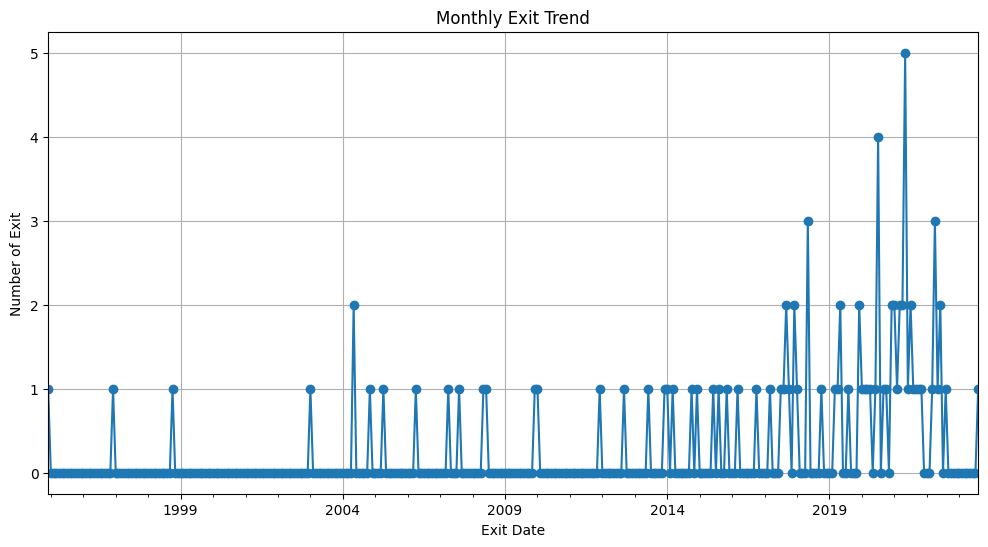

In [162]:
employee['Exit Date'] = pd.to_datetime(employee['Exit Date'], errors='coerce')
employee.set_index('Exit Date', inplace=True)


monthly_exit = employee.resample('M').size()


plt.figure(figsize=(12, 6))
monthly_exit.plot(kind='line', marker='o')
plt.xlabel('Exit Date')
plt.ylabel('Number of Exit')
plt.title('Monthly Exit Trend')
plt.grid(True)
plt.show()


close to the idea of hiring, the people who left the company varied with time. but during the years 2020-2022 more people left the company than ever.

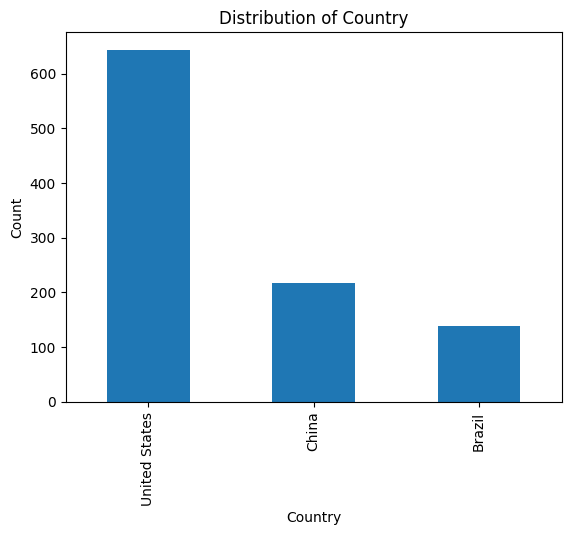

In [163]:
employee['Country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')
plt.show()

In [164]:
employee.head(3)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Annual Salary,Bonus %,Country,City
Exit Date,,,,,,,,,,,,
2020-01-08,23748,Yousef AbuALi,AI,IT,bussiness,Male,Asian,20.0,19000.0,4.9,United States,Miami
2018-05-25,74548,Jude tuqan,marketing,bussiness,bussiness,Female,Asian,25.0,9000.0,2.9,United States,Columbus
2012-09-18,84048,Jehad tuqan,bussiness,security,bussiness,Male,Asian,23.0,10000.0,0.9,United States,Columbus


### **References**

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

https://www.geeksforgeeks.org/data-visualization-with-python/

https://realpython.com/pandas-plot-python/